In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('/continuous_ged.csv')
#'Induced Edit Cost Sinkhorn Lower' = 1 if 'Induced Edit Cost Sinkhorn' < 'Induced Edit Cost Hungarian'; = -1 if 'Induced Edit Cost Sinkhorn' > 'Induced Edit Cost Hungarian'; =0 if 'Induced Edit Cost Sinkhorn' == 'Induced Edit Cost Hungarian'

In [5]:
col = sns.color_palette("mako")

In [6]:
dff = df[df['alpha'] > 1 ]
dff.head(-10)

,Matching Cost Hungarian,Matching Cost Sinkhorn,Matching Cost Sinkhorn Projection,Induced Edit Cost Hungarian,Induced Edit Cost Sinkhorn,Diversion Matching Cost Sinkhorn,Diversion Matching Cost Sinkhorn Projection,Error Induced Edit Cost,Entropy Sinkhorn Assignment,Mean Runtime Hungarian,Runtime Sinkhorn,Runtime Sinkhorn Projection,alpha,beta,Dataset,Mean Runtime Sinkhorn,Induced Edit Cost Sinkhorn Lower
0,2.0,11.216871,2.0,2.0,2.0,3.072290,0.000000,0.000000,10.120436,0.000006,0.008626,0.008970,2.0,2.0,Acyclic,0.001543,0
1,7.0,15.608168,7.0,10.0,9.0,1.076021,0.000000,-0.090909,12.835828,0.000006,0.000227,0.000247,2.0,2.0,Acyclic,0.001543,1
2,5.0,14.791974,5.0,8.0,7.0,1.631996,0.000000,-0.111111,12.839331,0.000006,0.000218,0.000234,2.0,2.0,Acyclic,0.001543,1
3,10.0,19.184215,10.0,13.0,12.0,0.834929,0.000000,-0.071429,15.697062,0.000006,0.000215,0.000231,2.0,2.0,Acyclic,0.001543,1
4,10.0,19.184215,10.0,13.0,12.0,0.834929,0.000000,-0.071429,15.697062,0.000006,0.000214,0.000229,2.0,2.0,Acyclic,0.001543,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4916460,21.0,21.000193,22.5,87.0,85.0,0.000009,0.068182,-0.022727,255.030693,0.000226,0.004209,0.004338,95.0,95.0,RNA,0.002051,1
4916461,27.5,25.941674,27.5,87.0,97.0,-0.054678,0.000000,0.113636,245.756314,0.000226,0.004607,0.004713,95.0,95.0,RNA,0.002051,-1
4916462,509.5,507.225872,509.5,643.0,643.0,-0.004455,0.000000,0.000000,923.606765,0.000226,0.004852,0.005483,95.0,95.0,RNA,0.002051,0
4916463,10.5,10.460603,10.5,67.0,72.0,-0.003426,0.000000,0.073529,237.159621,0.000226,0.004002,0.004114,95.0,95.0,RNA,0.002051,-1


In [10]:
#Je kleiner, desto öfter ist Sinkhorn besser als Hungarian
def upper_bound_sinkhorn_better(dataset_name, without_alpha_is_one):
  if dataset_name=='all':
    df_dataset = df
  else:
    df_dataset = df[df['Dataset']==dataset_name]

  if without_alpha_is_one == True:
    df_dataset = df_dataset[df_dataset['alpha']>1]

  alpha = list(set(df_dataset['alpha']))
  beta = list(set(df_dataset['beta']))

  pair = []
  rel_error_upper_bound_per_pair = []
  count_upper_bound_sinkhorn_higher_per_pair = []
  sinkhorn_better_sum_ec = []
  sinkhorn_better_count_ec = []
  hungarian_better_count_ec = []
  sinkhorn_matching_cost_smaller_0 = []
  sinkhorn_better_sum_mc = []
  sinkhorn_better_count_mc = []
  x = []
  y = []
  sinkhorn_better = []

  from matplotlib.colors import ListedColormap
  cmap = ListedColormap([[0.5800230680507498, 0.8189004229142637, 0.7502806612841215], [0.21697808535178778, 0.3273356401384083, 0.3694117647058824]])

  for m in alpha:
    for p in beta:
      _df = df_dataset[df_dataset['alpha']==m]
      __df = _df[_df['beta']==p]
      liste_count = list(__df['Induced Edit Cost Sinkhorn Lower'])
      kleiner_null = len(__df[__df['Diversion Matching Cost Sinkhorn']<0])
      groesser_null = len(__df[__df['Diversion Matching Cost Sinkhorn']>0])

      sb = 0
      hb = 0
      for i in range(len(liste_count)):
        if liste_count[i]==1:
          sb += 1
        if liste_count[i]==-1:
          hb +=1

      summe_sinkhorn_ec = sum(__df['Induced Edit Cost Sinkhorn'])
      summe_hungarian_ec = sum(__df['Induced Edit Cost Hungarian'])
      summe_sinkhorn_mc = sum(__df['Matching Cost Sinkhorn'])
      summe_hungarian_mc = sum(__df['Matching Cost Hungarian'])


      if summe_sinkhorn_ec < summe_hungarian_ec:
        sinkhorn_better_sum_ec.append(1)
      if summe_sinkhorn_ec > summe_hungarian_ec:
        sinkhorn_better_sum_ec.append(0)

      if sb > hb:
        sinkhorn_better_count_ec.append(1)
      if sb < hb:
        sinkhorn_better_count_ec.append(0)

      if summe_sinkhorn_mc < summe_hungarian_mc:
        sinkhorn_better_sum_mc.append(1)
      if summe_sinkhorn_mc > summe_hungarian_mc:
        sinkhorn_better_sum_mc.append(0)

      if kleiner_null > groesser_null:
        sinkhorn_better_count_mc.append(1)
      if kleiner_null < groesser_null:
        sinkhorn_better_count_mc.append(0)

      pair.append((m,p))
      #rel_error_upper_bound_per_pair.append(summe)

  for i in range(len(pair)):
    x.append(pair[i][0])
    y.append(pair[i][1])

  """plt.title("Sinkhorn has smaller sum of Induced Edit Costs")
  plt.scatter(x, y, c=sinkhorn_better_sum_ec, cmap=cmap)
  plt.xlabel("alpha")
  plt.ylabel("beta")
  cb = plt.colorbar(ticks=[0.25,.75])
  cb.set_ticklabels([0,1])
  plt.show()

  plt.title("Sinkhorn has more often smaller Induced Edit Costs")
  plt.scatter(x, y, c=sinkhorn_better_count_ec, cmap=cmap)
  plt.xlabel("alpha")
  plt.ylabel("beta")
  cb = plt.colorbar(ticks=[0.25,.75])
  cb.set_ticklabels([0,1])
  plt.show()

  plt.title("Sinkhorn has smaller sum of Matching Costs")
  plt.scatter(x, y, c=sinkhorn_better_sum_mc, cmap=cmap)
  plt.xlabel("alpha")
  plt.ylabel("beta")
  cb = plt.colorbar(ticks=[0.25,.75])
  cb.set_ticklabels([0,1])
  plt.show()

  plt.title("Sinkhorn has more often smaller Matching Costs")
  plt.scatter(x, y, c=sinkhorn_better_count_mc, cmap=cmap)
  plt.xlabel("alpha")
  plt.ylabel("beta")
  cb = plt.colorbar(ticks=[0.25,.75])
  cb.set_ticklabels([0,1])
  plt.show()"""
  return x, y, sinkhorn_better_count_ec, cmap

In [8]:
sns.set(font_scale=1.5)
sns.set_theme(style='white')

In [11]:
x, y, sinkhorn_better_count_ec, cmap = upper_bound_sinkhorn_better('all', without_alpha_is_one=True)

In [ ]:
#induced edit cost plot
mosaic = [['violin','points'],['alpha','beta']]
fig, axs = plt.subplot_mosaic(mosaic, figsize=(4*2, 4*2),sharex=False, sharey=False)
fig.tight_layout(pad = 3.0)

axs['violin'].set_ylim(ymin = -2, ymax=20)
sns.violinplot(data=dff, y="Error Induced Edit Cost", hue = 'Dataset', palette = 'GnBu_d', cut=0, ax=axs['violin']).set_title('A', loc = "left")
axs['violin'].set_ylabel('Error $error(\hat{X^S})$ Induced Edit Cost')

axs['points'].set_title('B', loc='left')
cax = axs['points'].scatter(x, y, c = sinkhorn_better_count_ec, cmap=cmap)
cb = fig.colorbar(cax, ticks=[0.25,0.75])
cb.set_ticklabels([0,1])

#alpha
sns.lineplot(x = 'alpha', y = "Error Induced Edit Cost", hue="beta", data = dff, palette = 'GnBu_d',ax=axs['alpha']).set_title('C', loc = "left")
axs['alpha'].set_ylabel('Error $error(\hat{X^S})$ Induced Edit Cost')

#beta
sns.lineplot(x = 'beta', y = "Error Induced Edit Cost", hue="alpha", data = dff, palette = 'GnBu_d',ax=axs['beta']).set_title('D', loc = "left")
axs['beta'].set_ylabel('Error $error(\hat{X^S})$ Induced Edit Cost')

(-2.953125, 20.0)

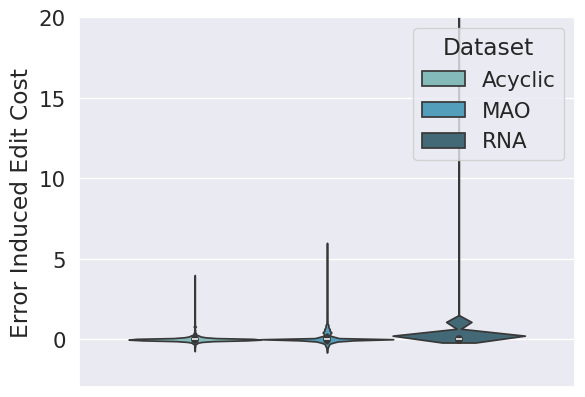

In [26]:
ax = sns.violinplot(data=dff, y="Error Induced Edit Cost", hue = 'Dataset', palette = 'GnBu_d', cut=0)
ax.set_ylim(ymax=20)

(-0.5, 1.0)

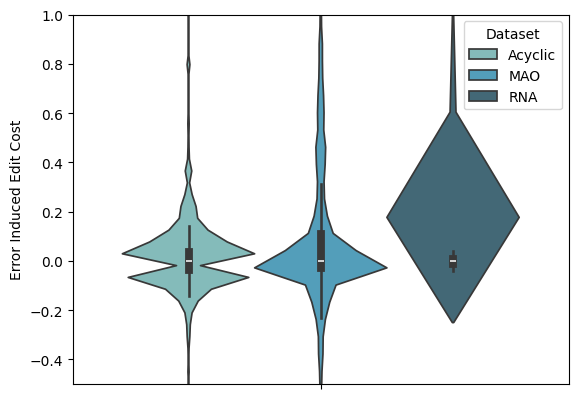

In [ ]:
ax = sns.violinplot(data=dff, y="Error Induced Edit Cost", hue = 'Dataset', palette = 'GnBu_d')
ax.set_ylim(ymax=1, ymin =-0.5)

(-0.5, 1.0)

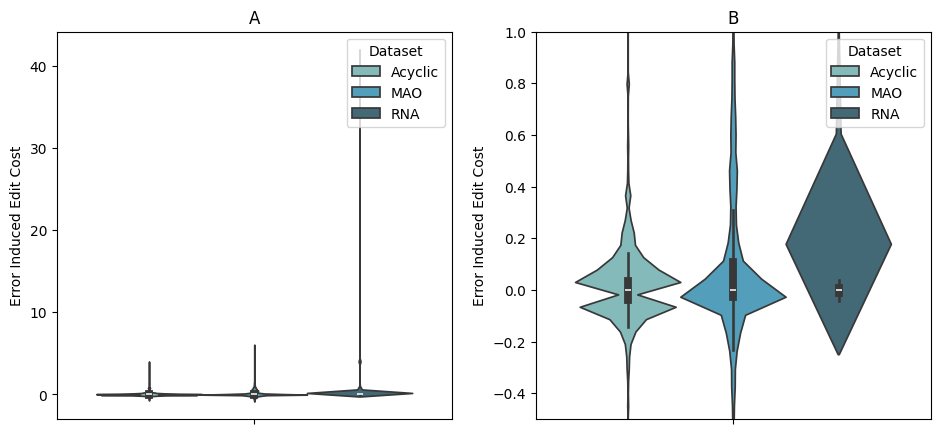

In [ ]:
#define plotting region (2 rows, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
fig.tight_layout(pad = 3.0)

#create boxplot in each subplot
sns.violinplot(data=dff, y="Error Induced Edit Cost", hue = 'Dataset', palette = 'GnBu_d',ax=axes[0]).set_title('A')
sns.violinplot(data=dff, y="Error Induced Edit Cost", hue = 'Dataset', palette = 'GnBu_d',ax=axes[1]).set_title('B')
axes[1].set_ylim(ymax=1, ymin =-0.5)

<Axes: ylabel='Diversion Matching Cost Sinkhorn'>

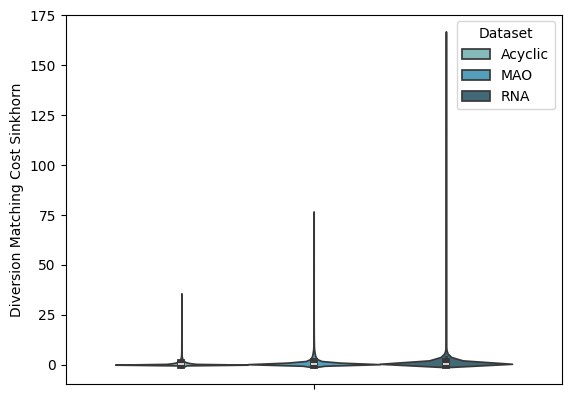

In [ ]:
sns.violinplot(data=dff, y="Diversion Matching Cost Sinkhorn", hue = 'Dataset', palette = 'GnBu_d')

(-1.5, 6.0)

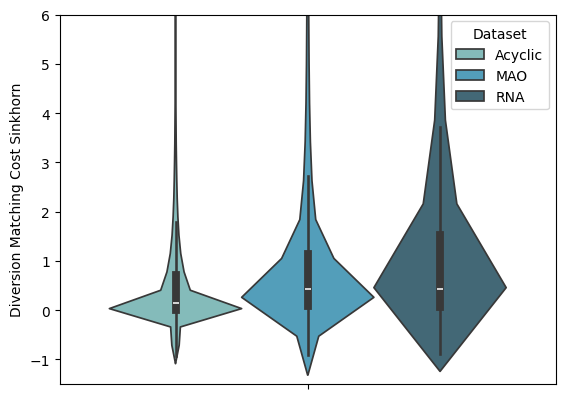

In [ ]:
ax = sns.violinplot(data=dff, y="Diversion Matching Cost Sinkhorn", hue = 'Dataset', palette = 'GnBu_d')
ax.set_ylim(ymax=6, ymin =-1.5)

(-1.5, 6.0)

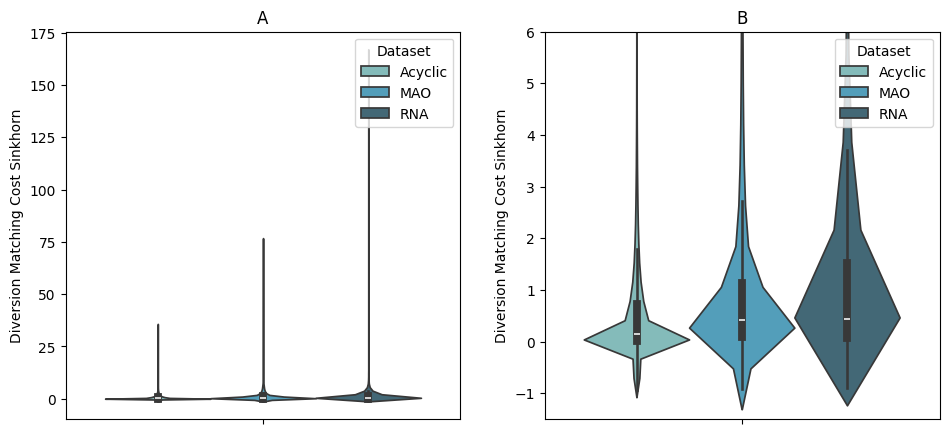

In [ ]:
#define plotting region (2 rows, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
fig.tight_layout(pad = 3.0)

#create boxplot in each subplot
sns.violinplot(data=dff, y="Diversion Matching Cost Sinkhorn", hue = 'Dataset', palette = 'GnBu_d',ax=axes[0]).set_title('A')
sns.violinplot(data=dff, y="Diversion Matching Cost Sinkhorn", hue = 'Dataset', palette = 'GnBu_d',ax=axes[1]).set_title('B')
axes[1].set_ylim(ymax=6, ymin =-1.5)

<Axes: ylabel='Diversion Matching Cost Sinkhorn Projection'>

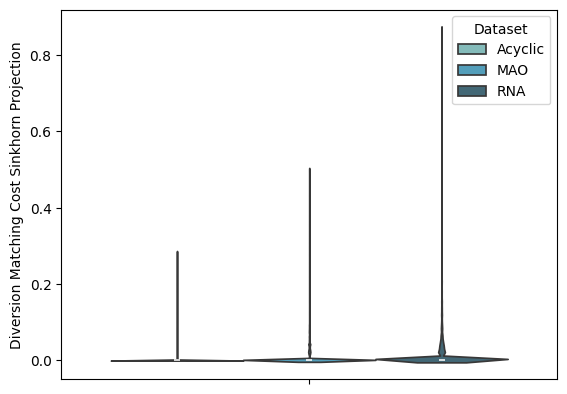

In [ ]:
sns.violinplot(data=dff, y="Diversion Matching Cost Sinkhorn Projection", hue = 'Dataset', palette = 'GnBu_d')

(-0.01, 0.02)

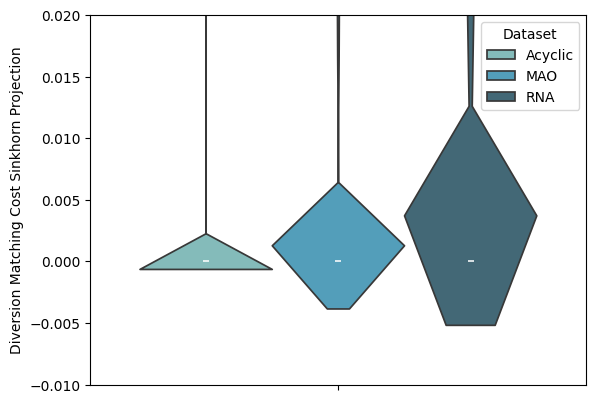

In [ ]:
ax = sns.violinplot(data=dff, y="Diversion Matching Cost Sinkhorn Projection", hue = 'Dataset', palette = 'GnBu_d')
ax.set_ylim(ymax=0.02, ymin =-0.01)

(-0.01, 0.02)

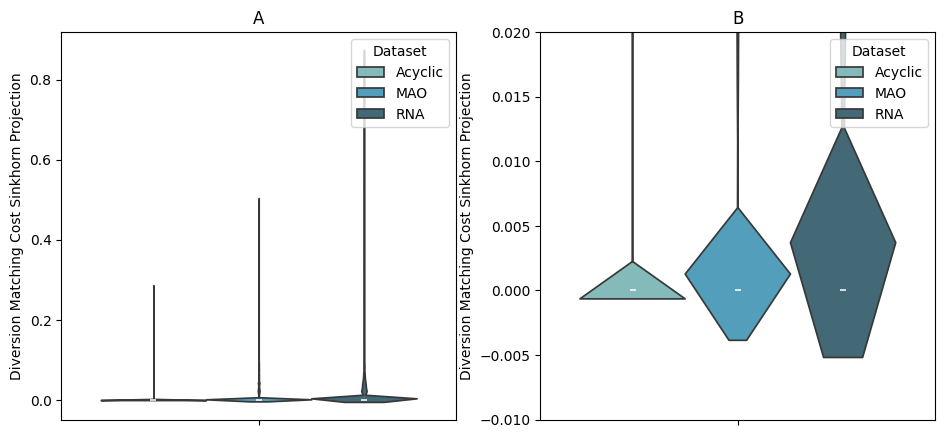

In [ ]:
#define plotting region (2 rows, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
fig.tight_layout(pad = 3.0)

#create boxplot in each subplot
sns.violinplot(data=dff, y="Diversion Matching Cost Sinkhorn Projection", hue = 'Dataset', palette = 'GnBu_d',ax=axes[0]).set_title('A')
sns.violinplot(data=dff, y="Diversion Matching Cost Sinkhorn Projection", hue = 'Dataset', palette = 'GnBu_d',ax=axes[1]).set_title('B')
axes[1].set_ylim(ymax=0.02, ymin =-0.01)

<Axes: xlabel='alpha', ylabel='Diversion Matching Cost Sinkhorn'>

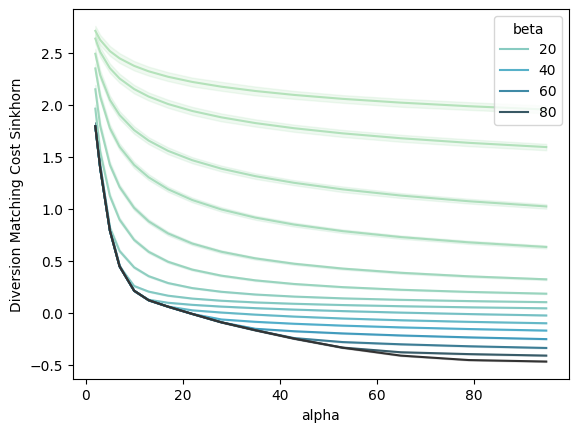

In [ ]:
sns.lineplot(x = "alpha", y = "Diversion Matching Cost Sinkhorn", hue="beta", data = dff, palette = 'GnBu_d')

<Axes: xlabel='beta', ylabel='Diversion Matching Cost Sinkhorn'>

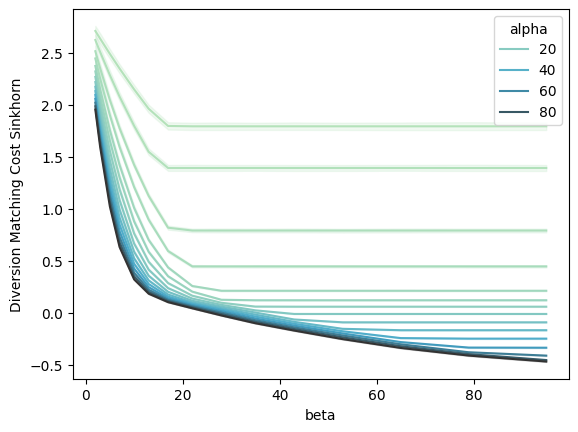

In [ ]:
sns.lineplot(x = "beta", y = "Diversion Matching Cost Sinkhorn", hue="alpha", data = dff, palette = 'GnBu_d')

<Axes: xlabel='beta', ylabel='Diversion Matching Cost Sinkhorn'>

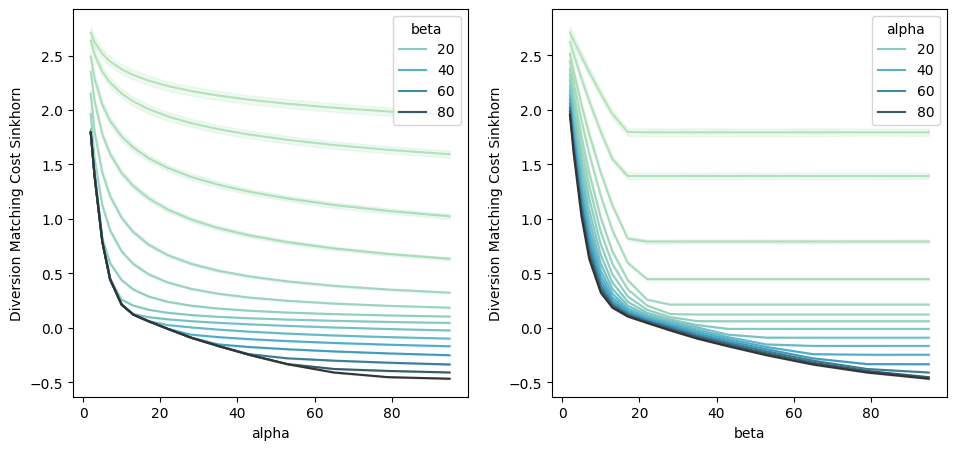

In [ ]:
#define plotting region (2 rows, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
fig.tight_layout(pad = 3.0)

#create boxplot in each subplot
sns.lineplot(x = "alpha", y = "Diversion Matching Cost Sinkhorn", hue="beta", data = dff, palette = 'GnBu_d',ax=axes[0])
sns.lineplot(x = "beta", y = "Diversion Matching Cost Sinkhorn", hue="alpha", data = dff, palette = 'GnBu_d',ax=axes[1])

<Axes: xlabel='alpha', ylabel='Diversion Matching Cost Sinkhorn Projection'>

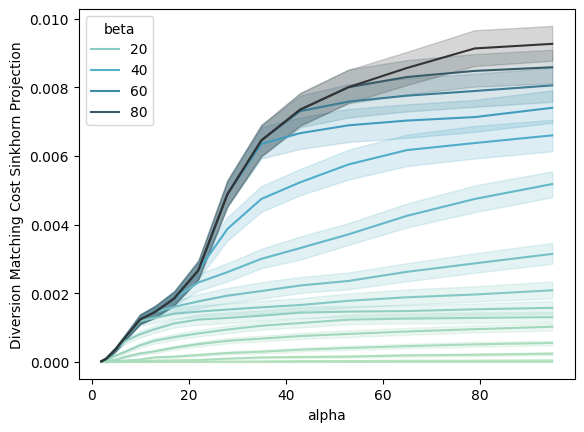

In [ ]:
sns.lineplot(x = "alpha", y = "Diversion Matching Cost Sinkhorn Projection", hue="beta", data = dff, palette = 'GnBu_d')

<Axes: xlabel='beta', ylabel='Diversion Matching Cost Sinkhorn Projection'>

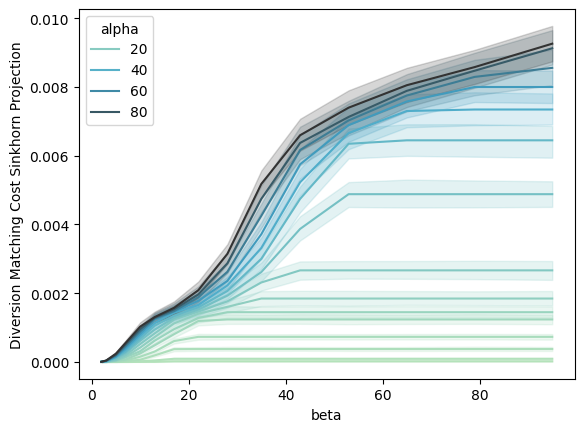

In [ ]:
sns.lineplot(x = "beta", y = "Diversion Matching Cost Sinkhorn Projection", hue = "alpha", data = dff, palette = 'GnBu_d')

<Axes: xlabel='beta', ylabel='Diversion Matching Cost Sinkhorn Projection'>

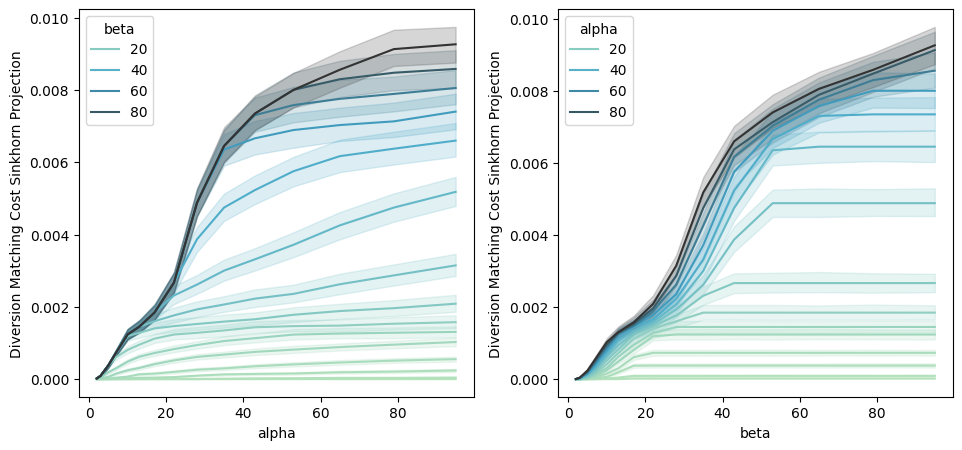

In [5]:
#define plotting region (2 rows, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
fig.tight_layout(pad = 3.0)

#create boxplot in each subplot
sns.lineplot(x = "alpha", y = "Diversion Matching Cost Sinkhorn Projection", hue="beta", data = dff, palette = 'GnBu_d',ax=axes[0])
sns.lineplot(x = "beta", y = "Diversion Matching Cost Sinkhorn Projection", hue="alpha", data = dff, palette = 'GnBu_d',ax=axes[1])

<Axes: xlabel='alpha', ylabel='Error Induced Edit Cost'>

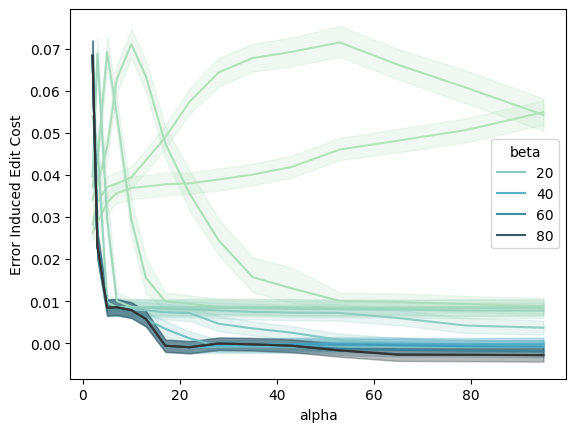

In [6]:
sns.lineplot(x = "alpha", y = "Error Induced Edit Cost", hue="beta", data = dff, palette = 'GnBu_d')

<Axes: xlabel='beta', ylabel='Error Induced Edit Cost'>

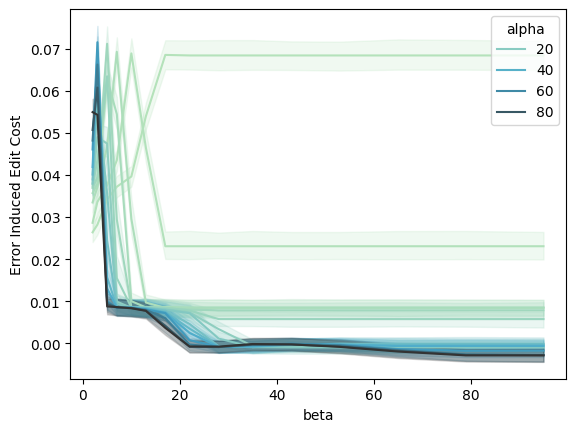

In [7]:
sns.lineplot(x = "beta", y = "Error Induced Edit Cost", hue="alpha", data = dff, palette = 'GnBu_d')

<Axes: xlabel='beta', ylabel='Error Induced Edit Cost'>

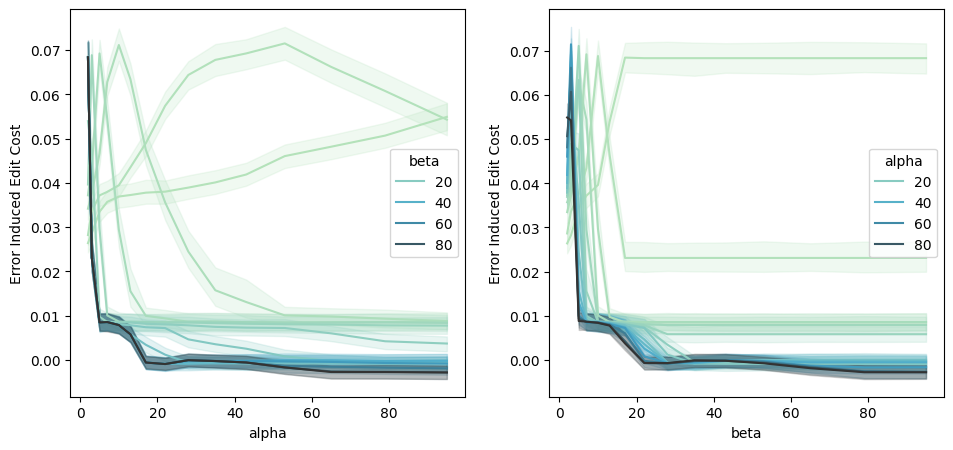

In [8]:
#define plotting region (2 rows, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
fig.tight_layout(pad = 3.0)

#create boxplot in each subplot
sns.lineplot(x = "alpha", y = "Error Induced Edit Cost", hue="beta", data = dff, palette = 'GnBu_d',ax=axes[0])
sns.lineplot(x = "beta", y = "Error Induced Edit Cost", hue="alpha", data = dff, palette = 'GnBu_d',ax=axes[1])

<Axes: xlabel='beta', ylabel='Mean Runtime Hungarian'>

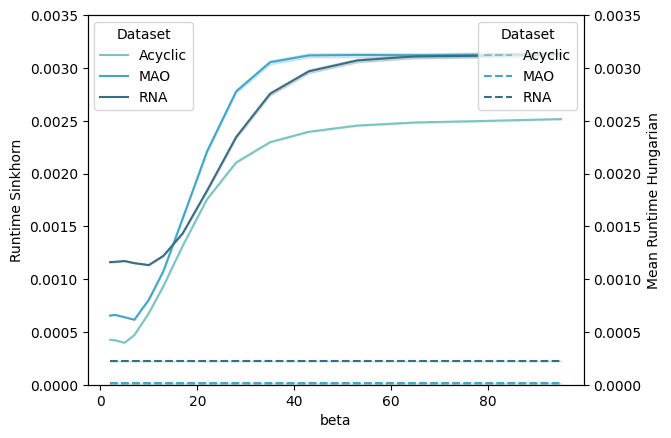

In [ ]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
a,b = 0,0.0035
ax1.set_ylim(a,b)
ax2.set_ylim(a,b)
sns.lineplot(x="beta",y="Runtime Sinkhorn", data=dff, hue = 'Dataset', palette = 'GnBu_d', ax = ax1)
sns.lineplot(x="beta",y="Mean Runtime Hungarian", data=dff, hue = 'Dataset', palette = 'GnBu_d', ax = ax2, ls = '--')

<Axes: xlabel='alpha', ylabel='Mean Runtime Hungarian'>

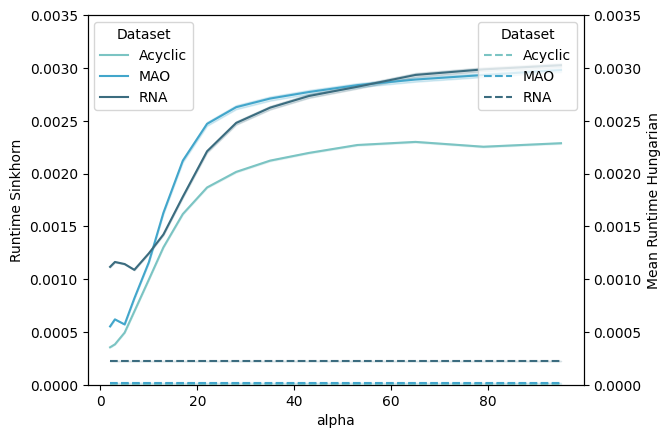

In [ ]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
a,b = 0,0.0035
ax1.set_ylim(a,b)
ax2.set_ylim(a,b)
sns.lineplot(x="alpha",y="Runtime Sinkhorn", data=dff, hue = 'Dataset', palette = 'GnBu_d', ax = ax1)
sns.lineplot(x="alpha",y="Mean Runtime Hungarian", data=dff, hue = 'Dataset', palette = 'GnBu_d', ax = ax2, ls = '--')

<Axes: xlabel='alpha', ylabel='Runtime Sinkhorn'>

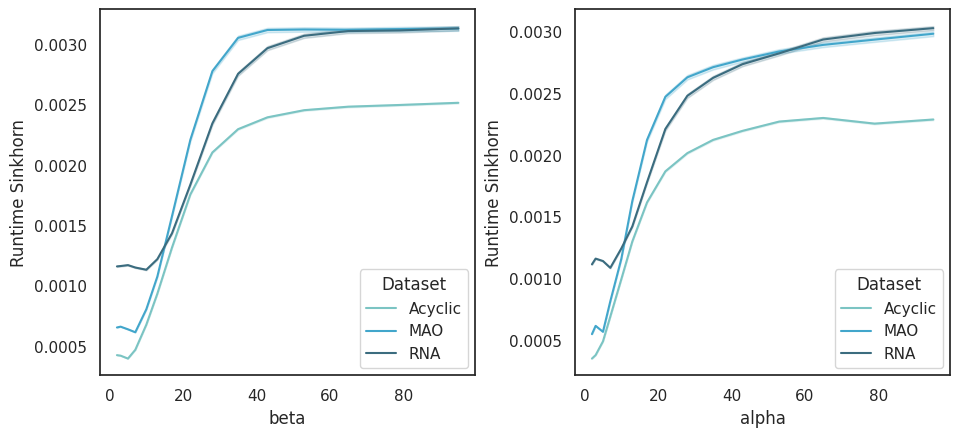

In [37]:
#define plotting region (1 rows, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
fig.tight_layout(pad = 3.0)

#create boxplot in each subplot
sns.lineplot(x="beta",y="Runtime Sinkhorn", data=dff, hue = 'Dataset', palette = 'GnBu_d', ax = axes[0]).set_title('A', loc = "left")
sns.lineplot(x="alpha",y="Runtime Sinkhorn", data=dff, hue = 'Dataset', palette = 'GnBu_d', ax = axes[1]).set_title('B', loc = "left")

In [10]:
import torch
import itertools
import numpy as np

def from_cost_to_sim_exp(C, alpha, beta):
  n, m = C.shape
  ones_m = torch.ones((1, m))
  ones_n = torch.ones((n, 1))
  minL, _ = C.min(dim=1)
  minL[-1] = 0.0
  Cp = C-(minL.view(n, 1)@ones_m)
  T = min(alpha, beta*torch.log(torch.tensor(alpha))/torch.max(Cp)) #*
  print("Cp max: ", torch.max(Cp))
  minC, _ = Cp.min(dim=0)
  minC[-1] = 0.0
  Cp = Cp-ones_n@minC.view(1, m)
  Cp = Cp/torch.max(Cp)
  S = torch.exp(-T*Cp)
  return S

In [15]:
cost_sim_df = pd.read_csv('/content/drive/MyDrive/NS_Projekt/from_cost_to_sim_df.csv')

<Axes: xlabel='c', ylabel='s'>

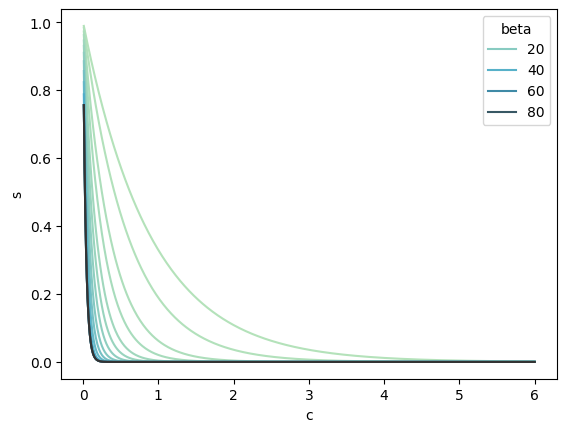

In [18]:
sns.lineplot(x = "c", y = "s", hue="beta", data = cost_sim_df[cost_sim_df['alpha'] == 28 ], palette = 'GnBu_d')

<Axes: xlabel='c', ylabel='s'>

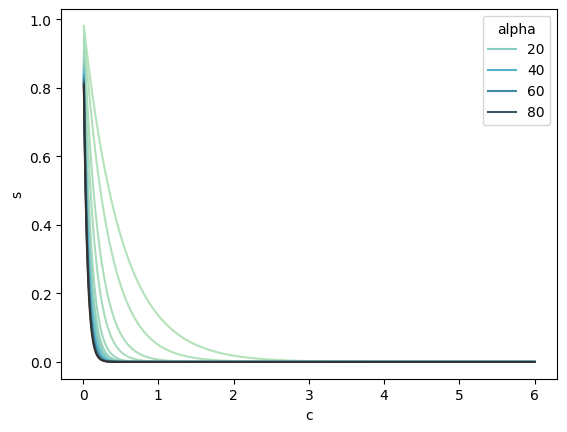

In [17]:
sns.lineplot(x = "c", y = "s", hue="alpha", data = cost_sim_df[cost_sim_df['beta'] == 28 ], palette = 'GnBu_d')

Text(0.0, 1.0, 'B')

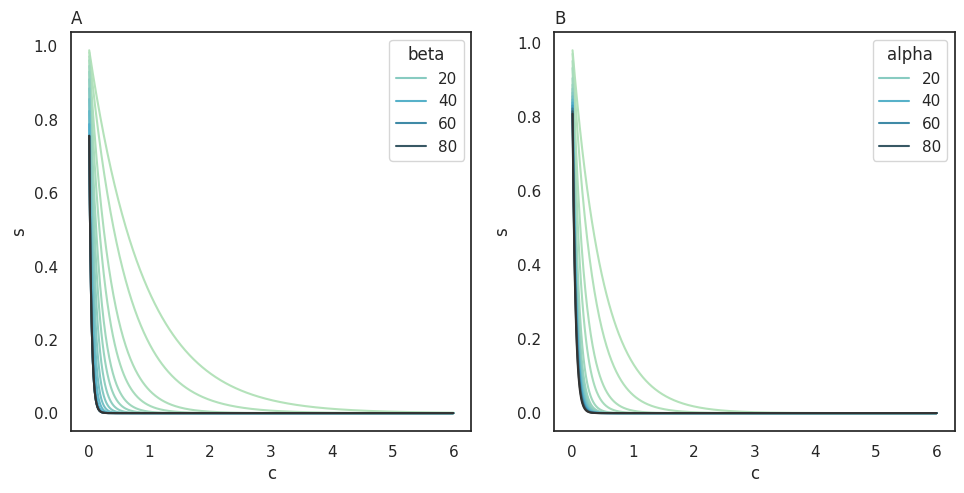

In [36]:
#define plotting region (2 rows, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
fig.tight_layout(pad = 2.0)

#create boxplot in each subplot
sns.lineplot(x = "c", y = "s", hue="beta", data = cost_sim_df[cost_sim_df['alpha'] == 28 ], palette = 'GnBu_d',ax=axes[0]).set_title('A', loc = "left")
sns.lineplot(x = "c", y = "s", hue="alpha", data = cost_sim_df[cost_sim_df['beta'] == 28 ], palette = 'GnBu_d',ax=axes[1]).set_title('B', loc = "left")